In [4]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import numpy as np
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sb
import pandas as pd
import math
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

%matplotlib inline


start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2019, 9, 1)

df = web.DataReader("INFY", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-26,11.23,11.10,11.21,11.13,6104400.0,11.13
2019-08-27,11.16,11.08,11.10,11.15,6968800.0,11.15
2019-08-28,11.26,11.13,11.19,11.20,5520600.0,11.20
2019-08-29,11.48,11.28,11.28,11.39,10932700.0,11.39
2019-08-30,11.50,11.37,11.48,11.49,7067000.0,11.49


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1928 entries, 2012-01-03 to 2019-08-30
Data columns (total 6 columns):
High         1928 non-null float64
Low          1928 non-null float64
Open         1928 non-null float64
Close        1928 non-null float64
Volume       1928 non-null float64
Adj Close    1928 non-null float64
dtypes: float64(6)
memory usage: 105.4 KB


In [6]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1928.000000,1928.000000,1928.000000,1928.000000,1.928000e+03,1928.000000
mean,7.941619,7.815257,7.878094,7.880200,1.179501e+07,6.913280
std,1.564228,1.544663,1.553776,1.554356,8.054584e+06,1.903975
min,4.826250,4.741250,4.785000,4.771250,1.068400e+06,3.664395
25%,6.838125,6.729687,6.778437,6.788438,7.409900e+06,5.321055
50%,7.834375,7.715000,7.773750,7.780000,9.970000e+06,6.872910
75%,9.023125,8.867500,8.940625,8.956250,1.392988e+07,8.056452
max,11.640000,11.490000,11.600000,11.550000,1.475912e+08,11.550000


In [7]:
df.shape

(1928, 6)

In [81]:
df.isnull().any()

Actual       False
Predicted    False
dtype: bool

#### Rolling Mean (Moving Average)

In [8]:
dat = df['Adj Close']
mavg = dat.rolling(window=100).mean()

In [9]:
mavg.tail(10)

Date
2019-08-19    10.706875
2019-08-20    10.712886
2019-08-21    10.718104
2019-08-22    10.720844
2019-08-23    10.721697
2019-08-26    10.722553
2019-08-27    10.724890
2019-08-28    10.725262
2019-08-29    10.727633
2019-08-30    10.732582
Name: Adj Close, dtype: float64

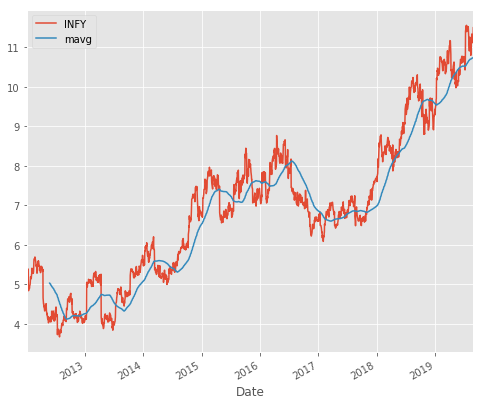

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

dat.plot(label='INFY')
mavg.plot(label='mavg')
plt.legend()

#### Return Deviation — to determine risk and return

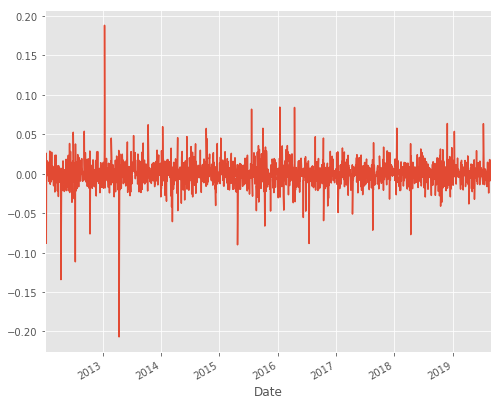

In [11]:
rets = dat / dat.shift(1) - 1
rets.plot(label='return')

## Analysing your Competitors Stocks

In [12]:
dfcomp = web.DataReader(['INFY.NS','TCS.NS','HCLTECH.NS','RELIANCE.NS'],'yahoo',start = datetime.datetime(2017, 1, 1),
end = datetime.datetime(2019, 1, 8))['Adj Close']

#### Correlation Analysis — Does one competitor affect others?

In [13]:
retscomp = dfcomp.pct_change()
corr = retscomp.corr()

In [14]:
corr

Symbols,INFY.NS,TCS.NS,HCLTECH.NS,RELIANCE.NS
Symbols,,,,
INFY.NS,1.000000,0.444352,0.447377,0.058689
TCS.NS,0.444352,1.000000,0.455685,-0.000674
HCLTECH.NS,0.447377,0.455685,1.000000,0.049276
RELIANCE.NS,0.058689,-0.000674,0.049276,1.000000


#### ScatterPlot 

Text(0,0.5,'Returns TCS')

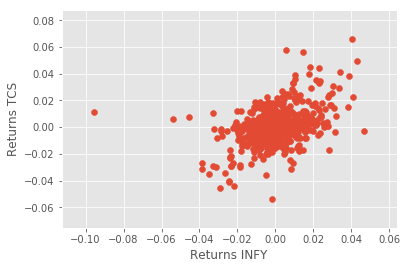

In [49]:
plt.scatter(retscomp['INFY.NS'], retscomp['TCS.NS'])
plt.xlabel('Returns INFY')
plt.ylabel('Returns TCS')

#### scatter_matrix

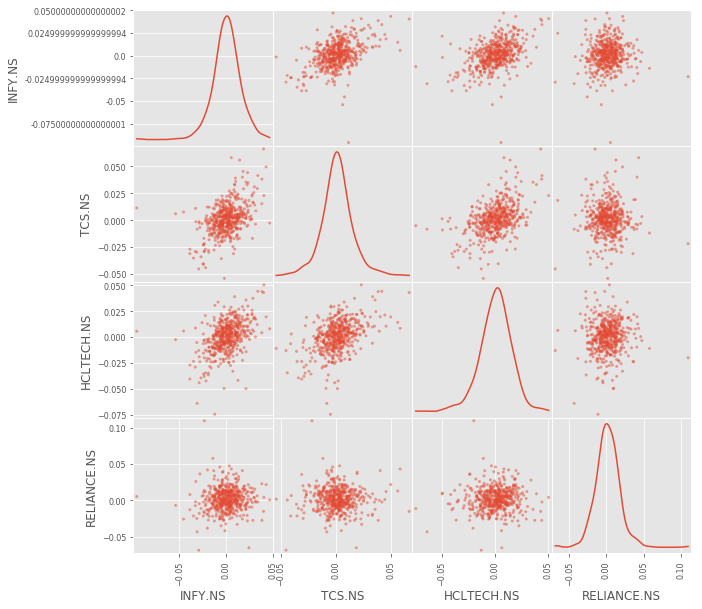

In [16]:
pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

#### Heatmap of Correlations

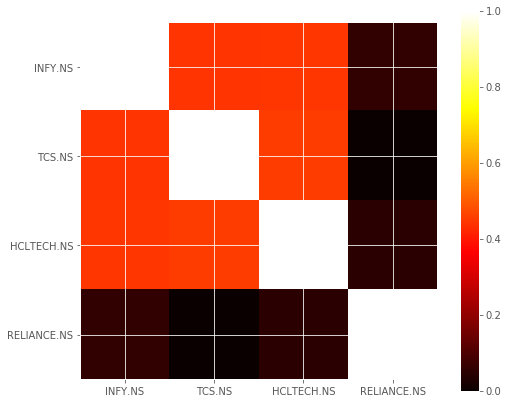

In [17]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

### Stocks Returns Rate and Risk

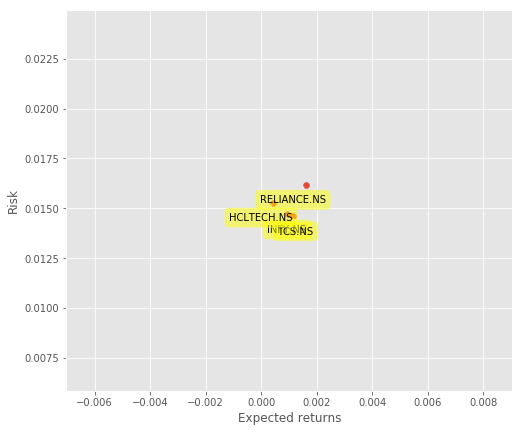

In [18]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [19]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

In [20]:
dfreg

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2012-01-03,5.057489,14123200.0,2.132833,-0.372788
2012-01-04,5.033834,9913600.0,1.785716,-0.746264
2012-01-05,5.110476,12347200.0,2.277355,1.503475
2012-01-06,5.101961,10824000.0,1.632050,0.204417
2012-01-09,5.236322,16880000.0,2.602094,2.159871
...,...,...,...,...
2019-08-26,11.130000,6104400.0,1.168007,-0.713648
2019-08-27,11.150000,6968800.0,0.717488,0.450444
2019-08-28,11.200000,5520600.0,1.160715,0.089368


# Predicting Stocks Price

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sb
import pandas as pd
import math
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

%matplotlib inline

### Feature Engineering

In [22]:
# Drop missing value
import math

dfreg.fillna(value=-99999, inplace=True)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))
# Scale the X so that everyone can have the same distribution for linear regression
X = scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

#### Pre-processing & Cross Validation

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [24]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#### Simple Linear Analysis & Quadratic Discriminant Analysis

In [26]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

6.982463493179684
[ 1.89052791 -0.00373194  0.01676958 -0.02410845]


In [80]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [28]:
y_pred = regressor.predict(X_test)

In [29]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,10.327541,9.023249
1,7.757854,7.889117
2,7.376413,7.808518
3,7.372863,7.170089
4,3.950481,3.855152
...,...,...
377,8.266868,7.836637
378,7.052270,7.921654
379,5.296856,6.052633
380,6.872894,7.245817


#### Bar graph showing the comparison of Actual and Predicted values.

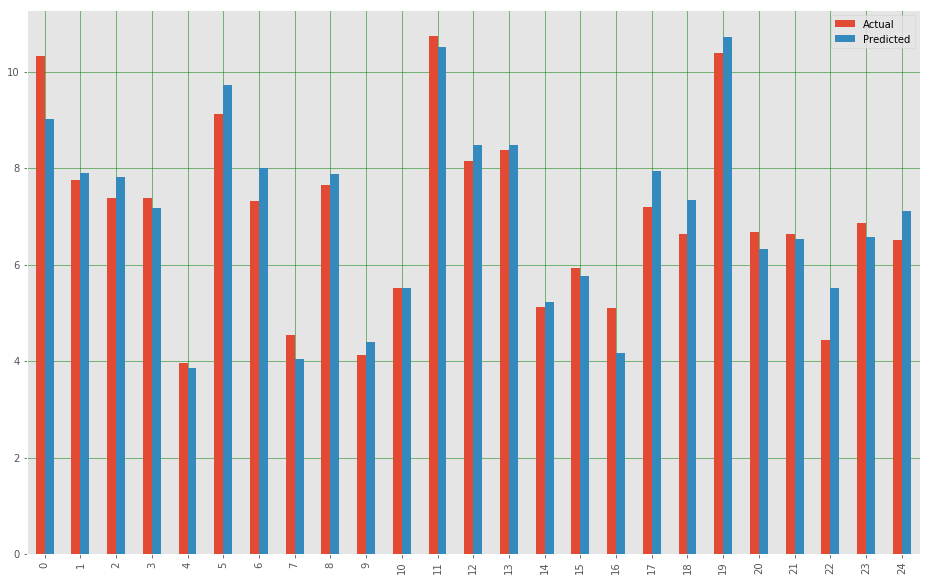

In [51]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [76]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.3651981166169927
Mean Squared Error: 0.21623682070613628
Root Mean Squared Error: 0.4650127102629952


In [52]:
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [53]:
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [61]:
# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)


Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [62]:
#len(X)
len(y)

1908

In [63]:
#x = X_train.reshape(-1,1)

In [64]:
#y = y_train.reshape(-1,1)

#### #### K Nearest Neighbor (KNN)

In [65]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline


clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

## Evaluation

In [66]:
print(clfknn.score(X_train, y_train))
print(clfknn.score(X_test, y_test))

0.9708527547814232
0.9007541099849865


In [67]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)
print('The linear regression confidence is{}'.format(confidencepoly2)) 
print('The quadratic regression 2 confidence{}'.format(confidencereg))
print('The quadratic regression 2 confidence{}'.format(confidencepoly3))
print('The quadratic regression 2 confidence{}'.format(confidenceknn))

The linear regression confidence is0.9390255462288141
The quadratic regression 2 confidence0.9387256342342709
The quadratic regression 2 confidence0.9375313468453946
The quadratic regression 2 confidence0.9007541099849865


In [68]:
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan

## Plotting the Prediction

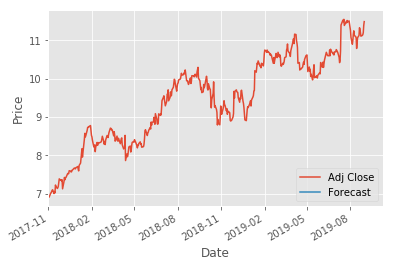

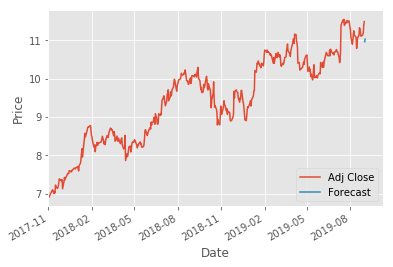

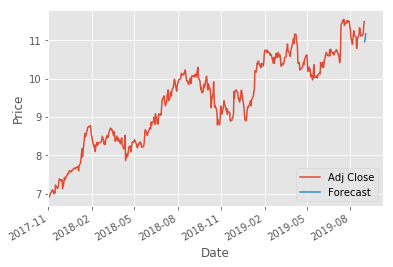

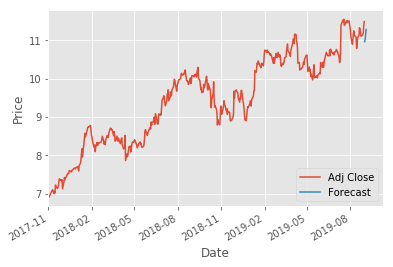

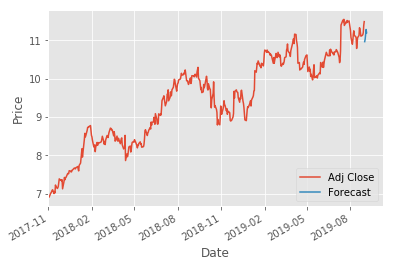

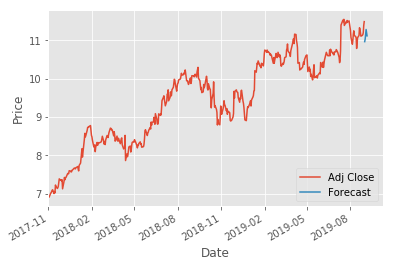

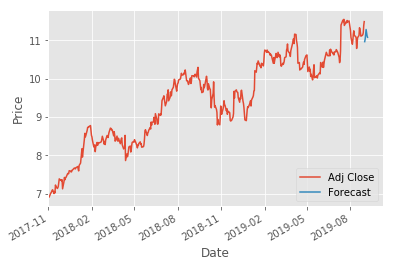

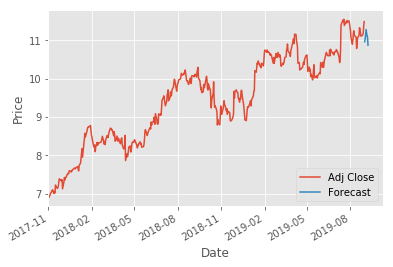

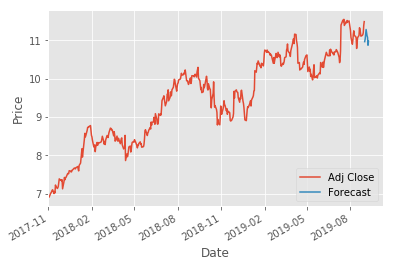

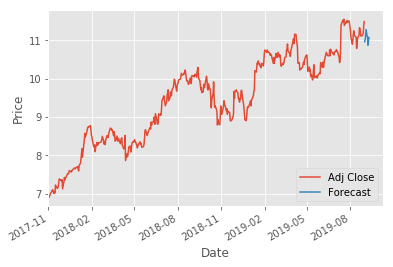

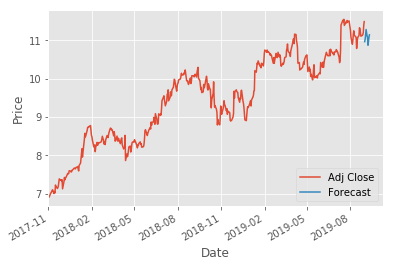

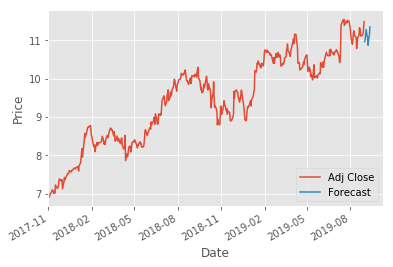

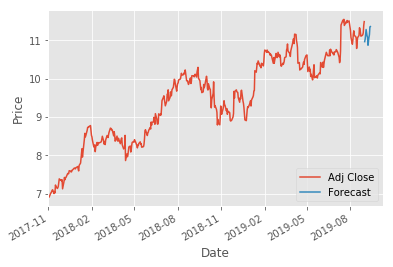

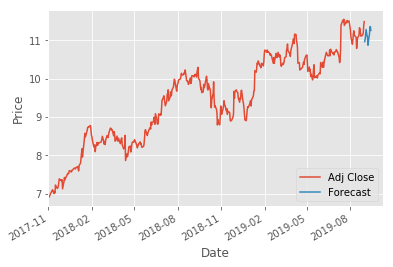

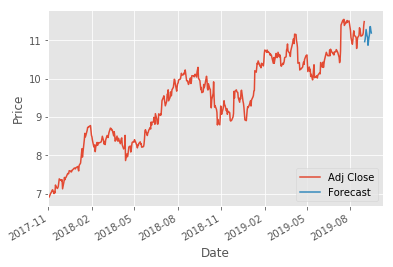

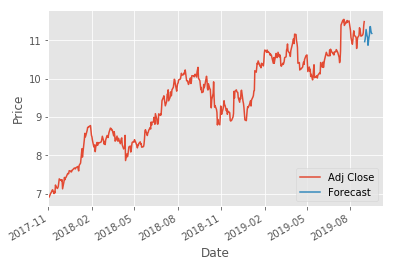

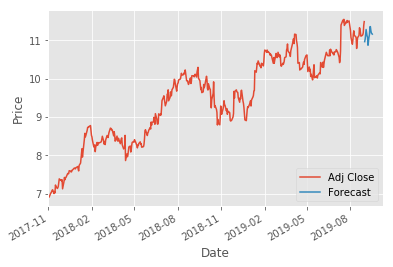

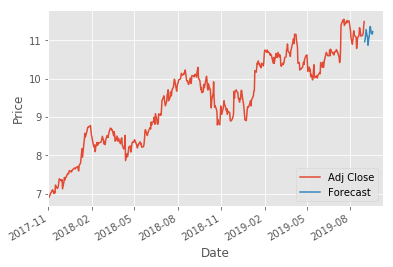

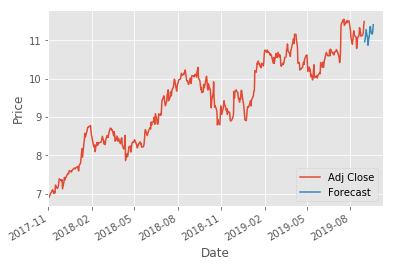

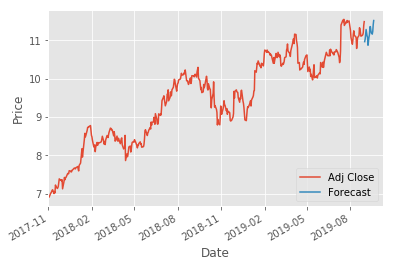

In [69]:
ast_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set: #CORRECTION: NAME UPDATED AND CODE DUPLICATED FOR NEW ALGORITHM
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]

    dfreg['Adj Close'].tail(500).plot()
    dfreg['Forecast'].tail(500).plot()
    plt.legend(loc=4)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

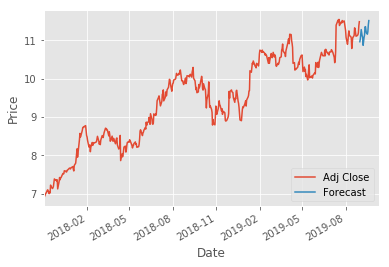

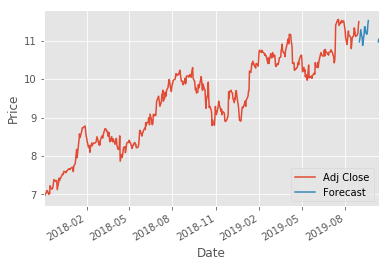

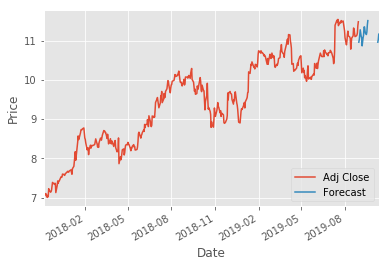

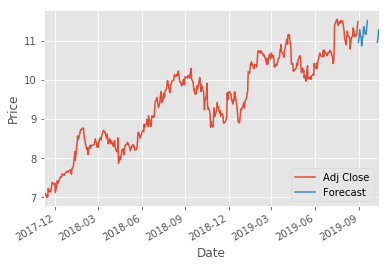

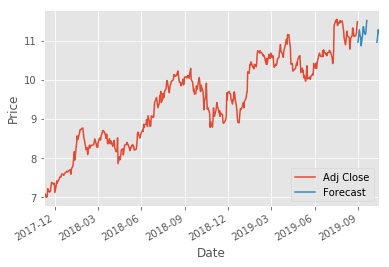

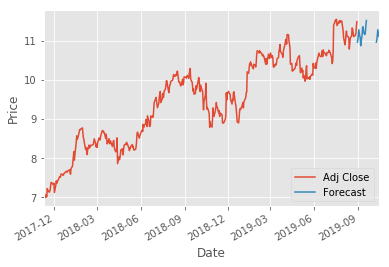

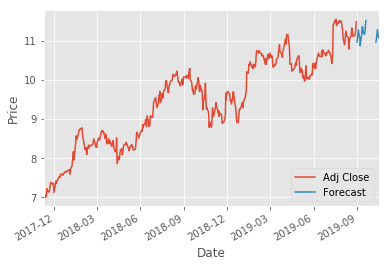

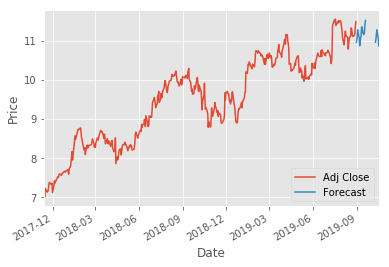

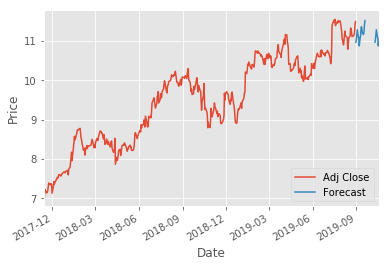

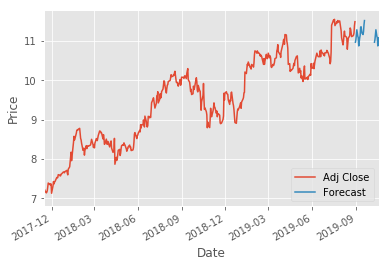

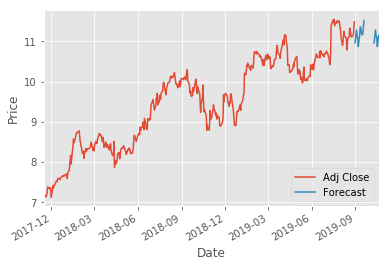

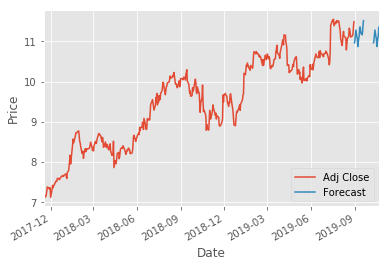

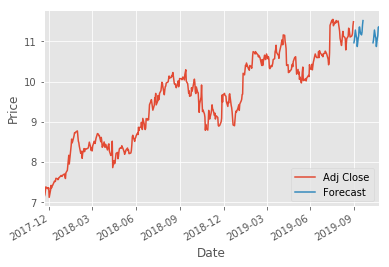

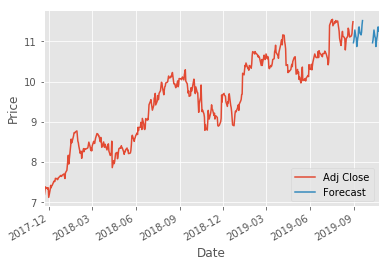

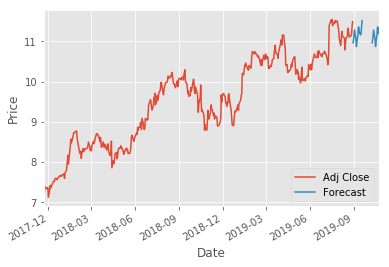

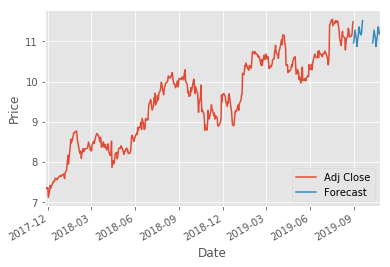

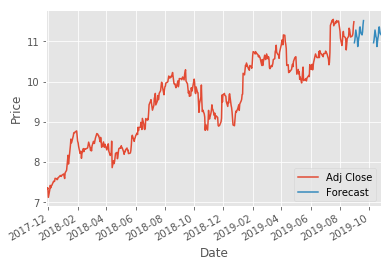

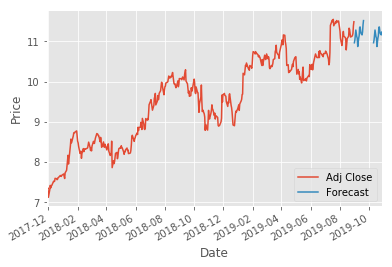

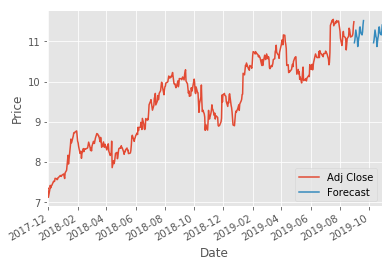

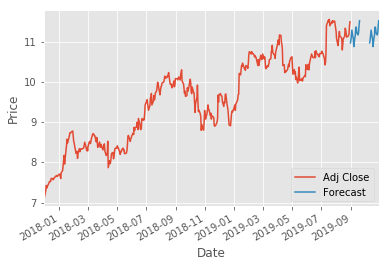

In [70]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]

    dfreg['Adj Close'].tail(500).plot()
    dfreg['Forecast'].tail(500).plot()
    plt.legend(loc=4)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

In [71]:
forecast_set_poly2 = clfpoly2.predict(X_lately)
dfreg['Forecast'] = np.nan

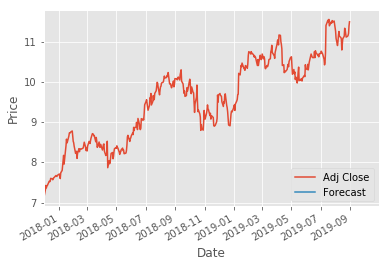

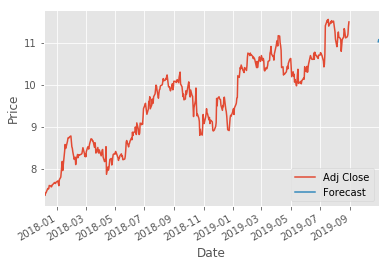

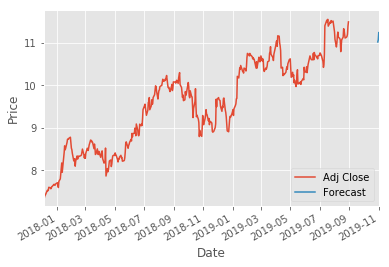

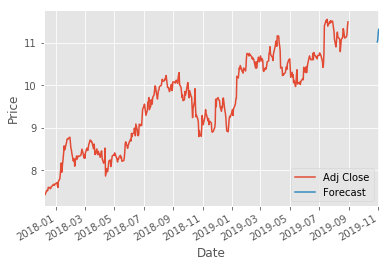

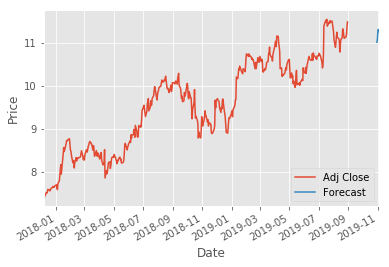

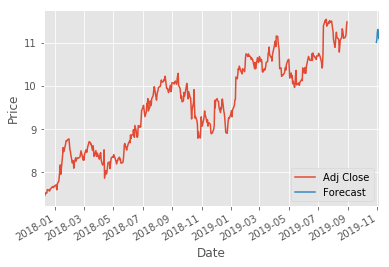

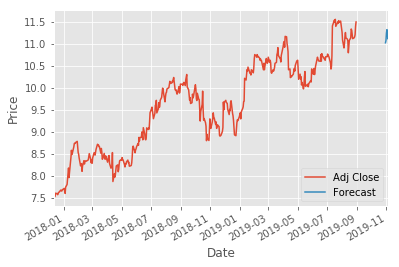

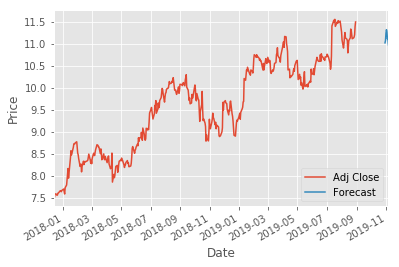

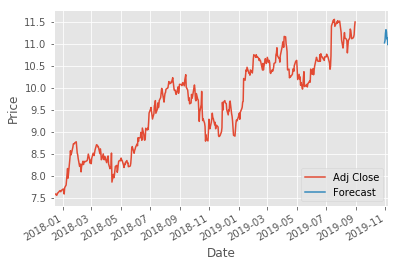

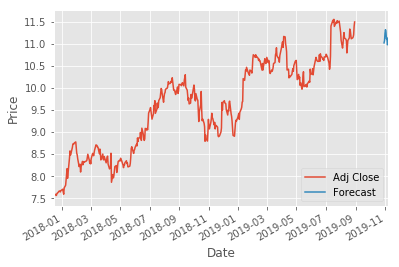

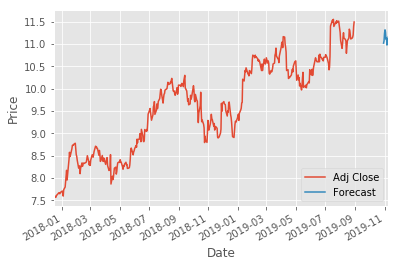

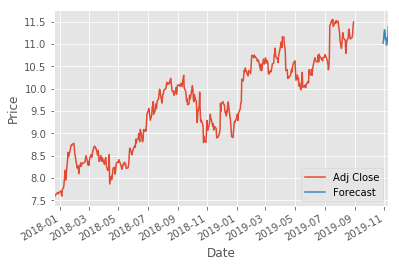

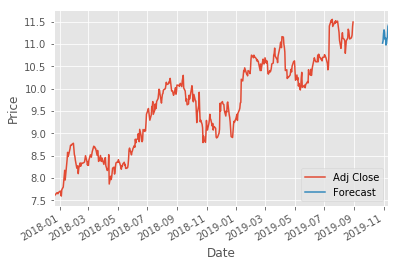

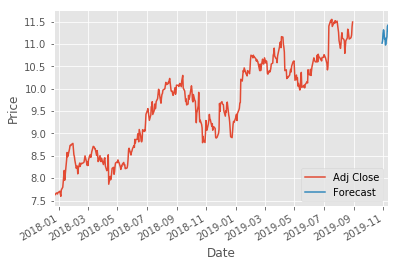

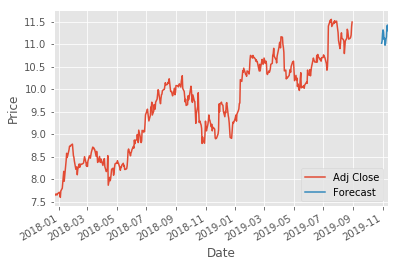

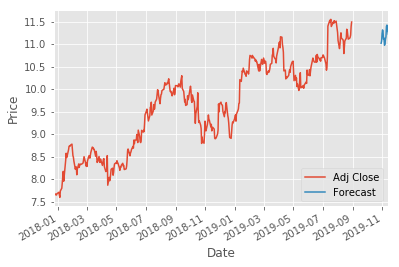

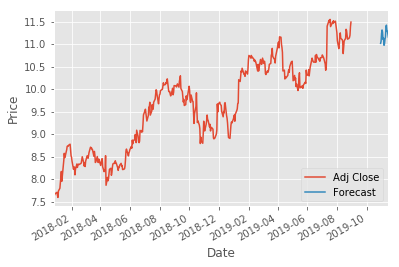

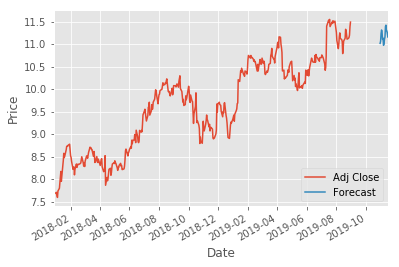

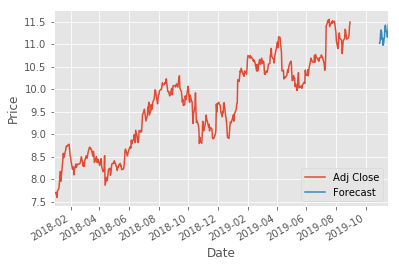

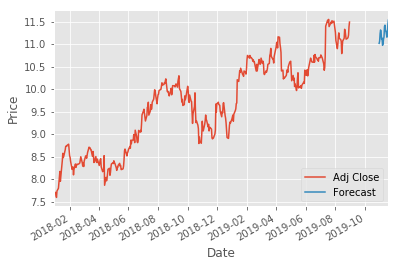

In [72]:
for i in forecast_set_poly2: 
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]

    dfreg['Adj Close'].tail(500).plot()
    dfreg['Forecast'].tail(500).plot()
    plt.legend(loc=4)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

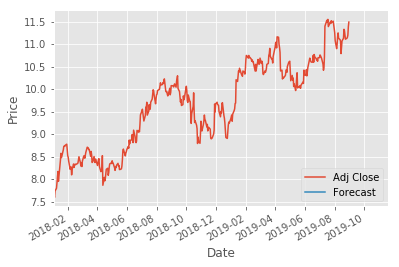

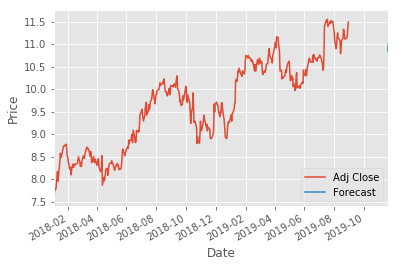

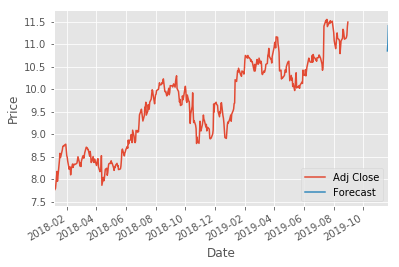

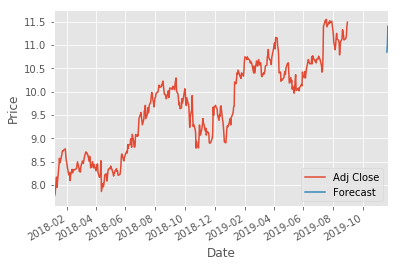

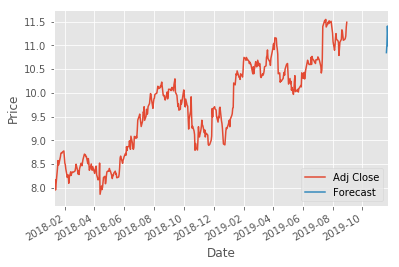

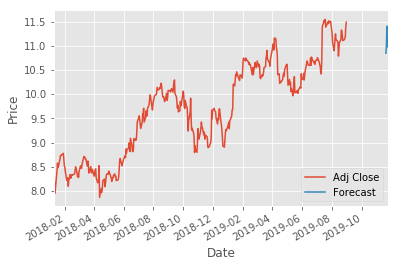

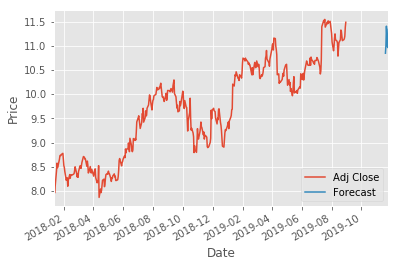

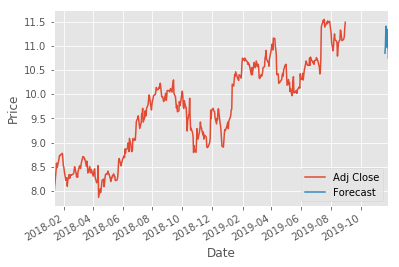

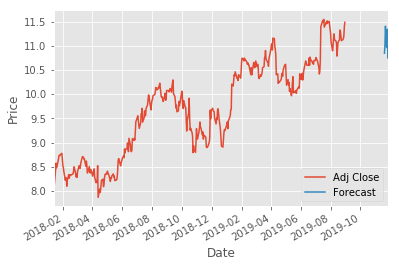

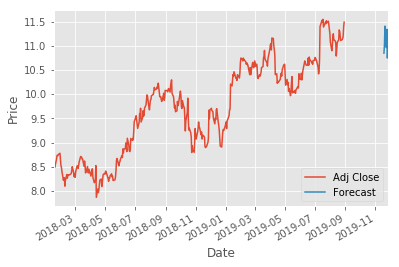

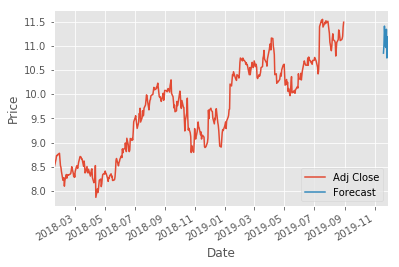

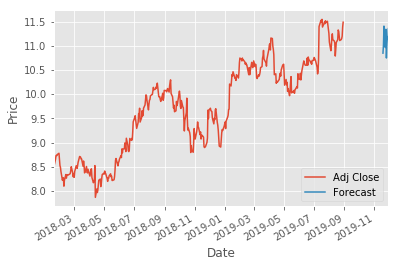

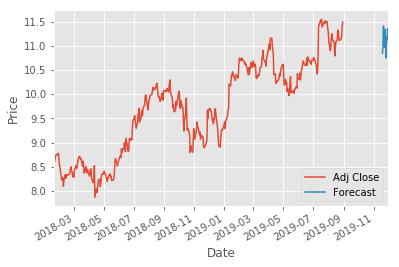

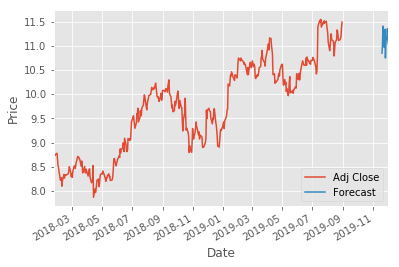

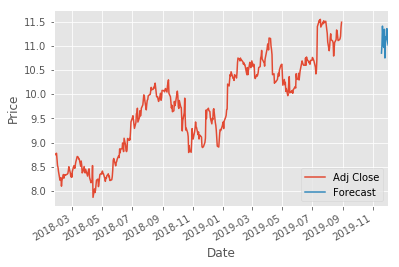

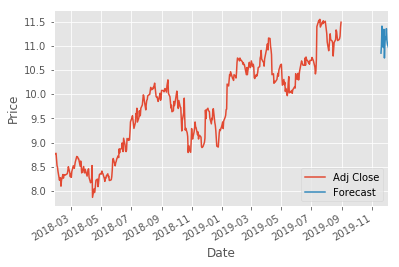

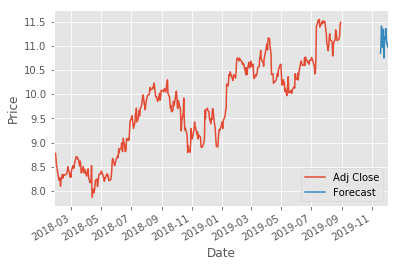

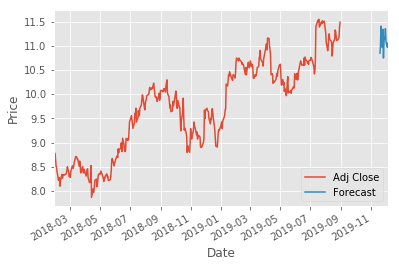

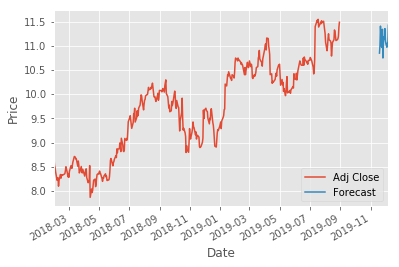

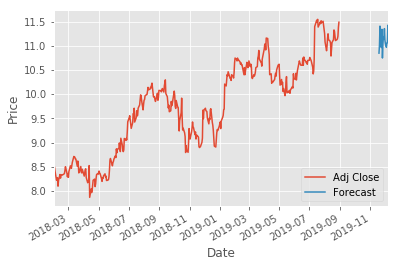

In [73]:
forecast_set_poly3 = clfpoly3.predict(X_lately)
dfreg['Forecast'] = np.nan
for i in forecast_set_poly3: 
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]

    dfreg['Adj Close'].tail(500).plot()
    dfreg['Forecast'].tail(500).plot()
    plt.legend(loc=4)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

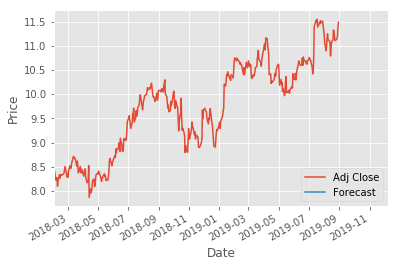

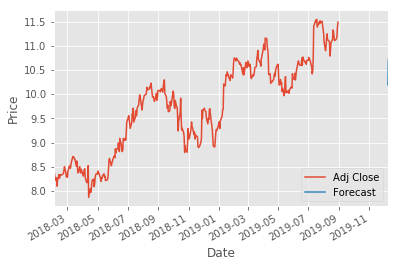

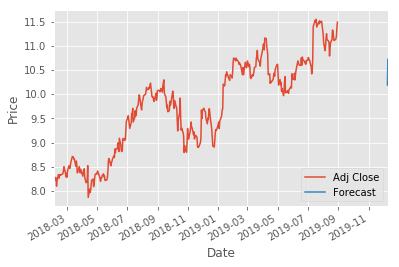

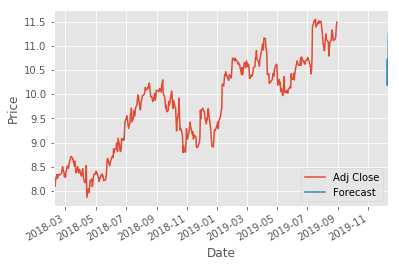

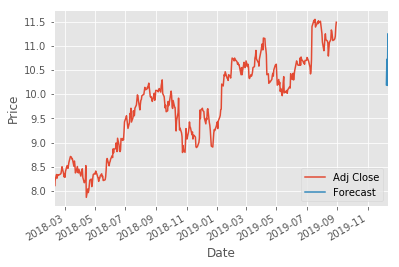

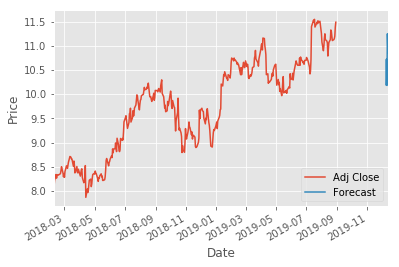

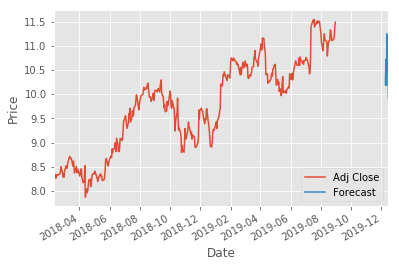

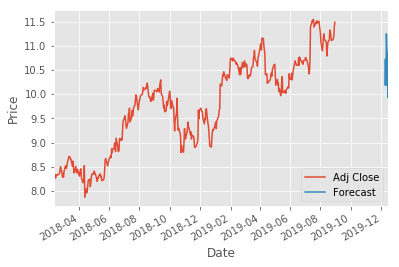

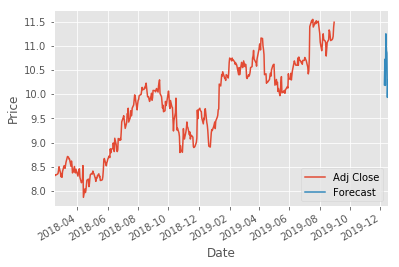

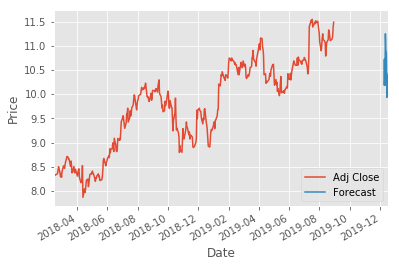

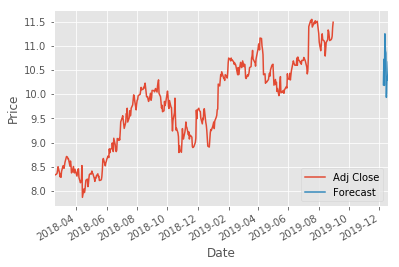

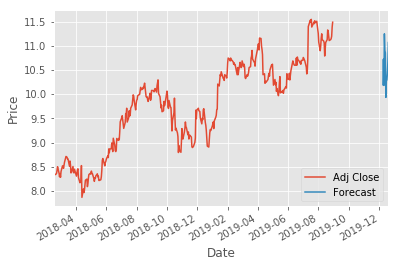

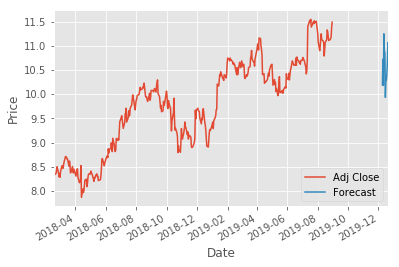

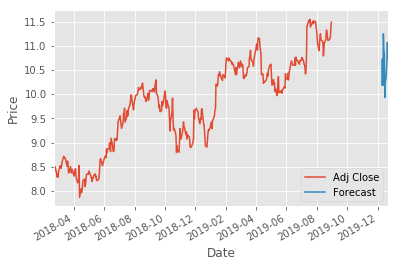

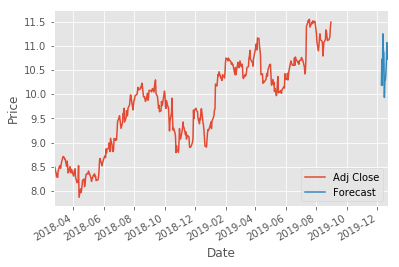

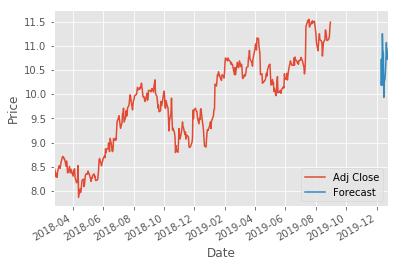

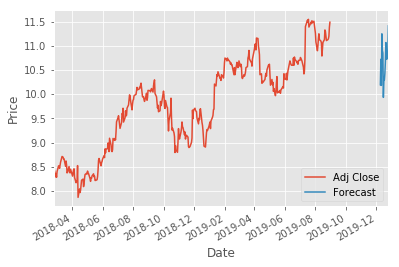

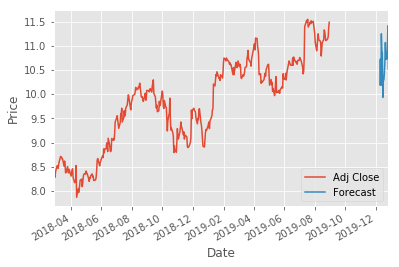

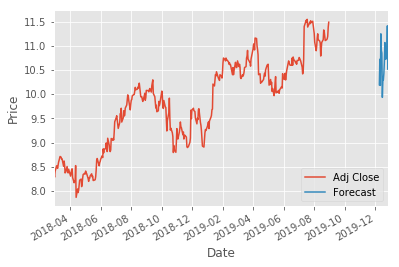

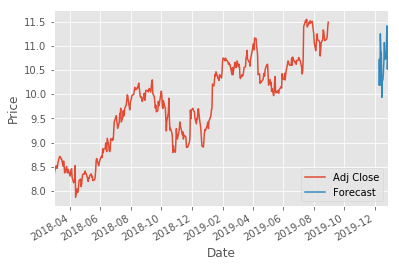

In [74]:
forecast_set_knn = clfknn.predict(X_lately)
dfreg['Forecast'] = np.nan
for i in forecast_set_knn: 
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]

    dfreg['Adj Close'].tail(500).plot()
    dfreg['Forecast'].tail(500).plot()
    plt.legend(loc=4)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()